# Capstone Webscrapping using BeautifulSoup

By : Salma Nabilah Rouf

This notebook contains guidances & tasks on the data processing for the application

## background

At this project, i will do a web scrapping method using BeautifulSoup. I scrap exchange rate Indonesian Rupiahs (IDR) per US Dollar (USD) data's from the exchange rates website (Exchange-Rates.org). Exchange-Rates.org allows us to check the latest foreign exchange rates. Data on the website is up-to-date and provided by one of the financial leaders. I will scrap historical exchange rates data the Indonesian Rupiah (IDR) and the US Dollar (USD) between 4/4/2022 and 9/30/2022. The data consist of the value of 1 USD in IDR with date and price per day. I made this project to complete my journey in Data Analytics Specialization at Algoritma Data Science Academy. 

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 500 character

In [4]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charse


## Finding the right key to scrap the data & Extracting the right information

Now we already have a tidier html and we should search the lines we needed. We have to find it from the website's html code. From the inspected element, we need to find the line table with class `table`. We can use the find method at our BeautifulSoup object. Let's call the object to see what we get.

The key step in web scraping is to find the right key to scrap the data. he first step to find the right key is go back on the website page. The informations that I need is contained in the table, to know which part of the code refer to that table, I can just move my cursor there, click on the right, and inspect element. Then I will see something like this.

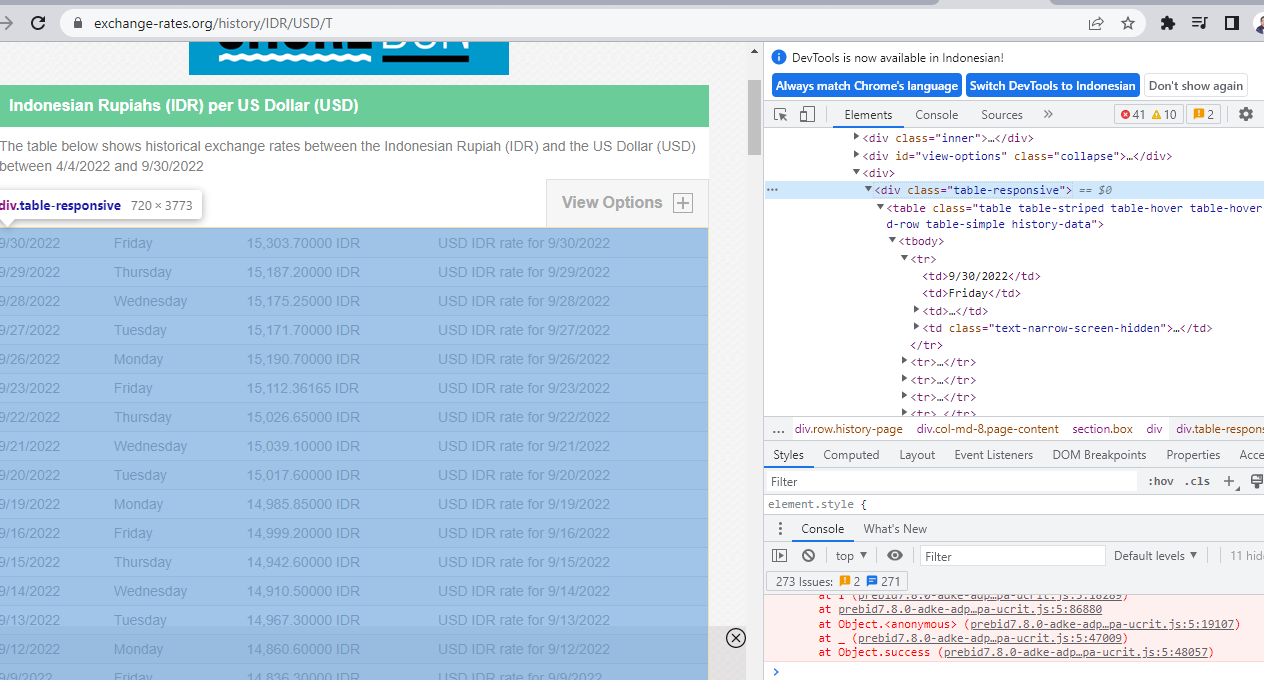

From the picture, I can know that i need to find the line table with tag `div` and class `table-responsive`. Then, I have to put the key into the method `.find()`at my beautifusoup object.

In [5]:
table = soup.find('div', attrs={'class':'table-responsive'})
print(table.prettify()[1:500])

div class="table-responsive">
 <table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
  <tbody>
   <tr>
    <td>
     9/30/2022
    </td>
    <td>
     Friday
    </td>
    <td>
     <a href="/Rate/USD/IDR/9-30-2022">
      15,303.70000
     </a>
     IDR
    </td>
    <td class="text-narrow-screen-hidden">
     <a href="/Rate/USD/IDR/9-30-2022">
      USD IDR rate for 9/30/2022
     </a>
    </td>
   </tr>
   <tr>
    <td>
     9/29/2022
    </td>
    <


Finding row length.

In [6]:
row = table.find_all('tr')
row_length = len(row)
row_length

130

Here are for the looping informations:
- First I need to establish a placeholder to receive the information that I scrap. 
- I named it `temp` and it's a tuple. 
- Then I will make a loop from one until the the length of the table row, here i use looping `for` to write information that needed. The range looping for is start from 0 to 130(length of the row)
- By then, I will find all cell of the column one and two which contain date and the exchange rate US to IDR. 
- I will append it to our tuple that I prepared before, 
- every one iteration, i  scrap one line of the table from the oldest date to newest

lets see this code

In [7]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #to take data table from all rows completely
    exchange = table.find_all('tr')[i]
    #use the key to take information here
    #name_of_object = row.find_all(...)[0].text
        
    #get date from all rows 
    date = exchange.find_all('td')[0].text
        
    #get price from all rows
    price = exchange.find_all('td')[2].text
        
    temp.append((date,price)) #append the needed information      
    
temp 

[('9/30/2022', '15,303.70000 IDR'),
 ('9/29/2022', '15,187.20000 IDR'),
 ('9/28/2022', '15,175.25000 IDR'),
 ('9/27/2022', '15,171.70000 IDR'),
 ('9/26/2022', '15,190.70000 IDR'),
 ('9/23/2022', '15,112.36165 IDR'),
 ('9/22/2022', '15,026.65000 IDR'),
 ('9/21/2022', '15,039.10000 IDR'),
 ('9/20/2022', '15,017.60000 IDR'),
 ('9/19/2022', '14,985.85000 IDR'),
 ('9/16/2022', '14,999.20000 IDR'),
 ('9/15/2022', '14,942.60000 IDR'),
 ('9/14/2022', '14,910.50000 IDR'),
 ('9/13/2022', '14,967.30000 IDR'),
 ('9/12/2022', '14,860.60000 IDR'),
 ('9/9/2022', '14,836.30000 IDR'),
 ('9/8/2022', '14,894.20000 IDR'),
 ('9/7/2022', '14,908.30000 IDR'),
 ('9/6/2022', '14,900.50000 IDR'),
 ('9/5/2022', '14,889.50000 IDR'),
 ('9/2/2022', '14,892.30000 IDR'),
 ('9/1/2022', '14,902.15000 IDR'),
 ('8/31/2022', '14,848.70000 IDR'),
 ('8/30/2022', '14,851.00000 IDR'),
 ('8/29/2022', '14,886.25000 IDR'),
 ('8/26/2022', '14,829.95000 IDR'),
 ('8/25/2022', '14,774.80000 IDR'),
 ('8/24/2022', '14,836.40000 IDR'),

If you notice, the iteration result show the reversed data from the original website. As we want the data same as the webpage (newest date is on top) then we need to reverse our list, we can use `::-1` to do that.

In [8]:
temp = temp[::-1]
temp

[('4/4/2022', '14,328.90000 IDR'),
 ('4/5/2022', '14,368.50000 IDR'),
 ('4/6/2022', '14,380.95000 IDR'),
 ('4/7/2022', '14,374.45000 IDR'),
 ('4/8/2022', '14,370.65000 IDR'),
 ('4/11/2022', '14,373.00000 IDR'),
 ('4/12/2022', '14,376.50000 IDR'),
 ('4/13/2022', '14,372.00000 IDR'),
 ('4/14/2022', '14,383.95000 IDR'),
 ('4/15/2022', '14,366.76704 IDR'),
 ('4/18/2022', '14,353.85000 IDR'),
 ('4/19/2022', '14,375.50000 IDR'),
 ('4/20/2022', '14,364.00000 IDR'),
 ('4/21/2022', '14,386.00000 IDR'),
 ('4/22/2022', '14,470.00000 IDR'),
 ('4/25/2022', '14,426.50000 IDR'),
 ('4/26/2022', '14,432.50000 IDR'),
 ('4/27/2022', '14,447.55000 IDR'),
 ('4/28/2022', '14,516.00000 IDR'),
 ('4/29/2022', '14,525.10000 IDR'),
 ('5/2/2022', '14,526.60000 IDR'),
 ('5/3/2022', '14,455.80000 IDR'),
 ('5/4/2022', '14,430.00000 IDR'),
 ('5/5/2022', '14,458.75000 IDR'),
 ('5/6/2022', '14,498.65000 IDR'),
 ('5/9/2022', '14,552.25000 IDR'),
 ('5/10/2022', '14,526.40000 IDR'),
 ('5/11/2022', '14,545.90000 IDR'),
 ('

At this point we can fix our list. Then, we can input it to a pandas' DataFrame and do usual data analysis

## Creating data frame & Data wrangling

Put the array into dataframe

In [9]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date','Price (IDR)'))
df.head()

,Date,Price (IDR)
0,4/4/2022,"14,328.90000 IDR"
1,4/5/2022,"14,368.50000 IDR"
2,4/6/2022,"14,380.95000 IDR"
3,4/7/2022,"14,374.45000 IDR"
4,4/8/2022,"14,370.65000 IDR"


Let's check our dataframe data types to see if our data is useable. 

In [10]:
df.dtypes

Date           object
Price (IDR)    object
dtype: object

### **The data cleaning :**
- To make the data useful, I have to change date columns's type into datetime64
- I also have to change the Price column to float datatype, but before I can do that, I need to change the `","` to `" "` first. To do this I can use the help of `str.replace()`. If I see from the list, price column have `IDR` as string, then I also have to remove it by using `str.replace()`

In [11]:
#change type of date into datetime64
df['Date'] = df['Date'].astype('datetime64')

#for price column, remove string IDR; replace (,) to (.) and change its type to float
df['Price (IDR)'] = df['Price (IDR)'].str.replace(',', '')
df['Price (IDR)'] = df['Price (IDR)'].str.replace('IDR', '')
df['Price (IDR)'] = df['Price (IDR)'].astype('float64')
df.dtypes

Date           datetime64[ns]
Price (IDR)           float64
dtype: object

I make new column named 'Month' with `.dt.month_name` because i want to make data visualization in exchange rate by Month. Don't forget to change its datatype to category

In [12]:
df['Month'] = df['Date'].dt.month_name()
df['Month'] = df['Month'].astype('category')
df.head()

,Date,Price (IDR),Month
0,2022-04-04,14328.90,April
1,2022-04-05,14368.50,April
2,2022-04-06,14380.95,April
3,2022-04-07,14374.45,April
4,2022-04-08,14370.65,April


Change Date column as index with `.set_index()`


In [13]:
df = df.set_index('Date')
df.head()

,Price (IDR),Month
Date,,
2022-04-04,14328.90,April
2022-04-05,14368.50,April
2022-04-06,14380.95,April
2022-04-07,14374.45,April
2022-04-08,14370.65,April


Checking the sum of missing value with `.isna().sum()`

In [14]:
df.isna().sum()

Price (IDR)    0
Month          0
dtype: int64

I want to see the average exchange rate per month. I can get this information from by using method `groupby()` and `mean()`

In [15]:
df1 = df.set_index('Month')
avg= df1.groupby(['Month']).mean().round(2).sort_values(by =['Price (IDR)'], ascending=False)
avg = avg[::-1]
avg

,Price (IDR)
Month,
April,14399.63
May,14582.41
June,14708.57
August,14831.29
July,14973.67
September,15005.16


By this, the data is clean and ready to use 

### Data Visualization

To make the data easy to read, i will make a data visualization. Because the exchange rate is time series data, by then the proper plot to visualize is by line plot graph

<AxesSubplot:title={'center':'Exchange Rate US TO IDR'}, xlabel='Date'>

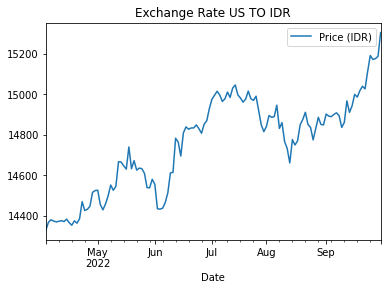

In [16]:
df.plot(title = 'Exchange Rate US TO IDR')

<AxesSubplot:title={'center':'The Average Exchange Rate US TO IDR'}, xlabel='Month'>

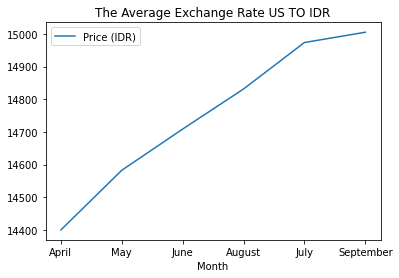

In [17]:
avg.plot(title = 'The Average Exchange Rate US TO IDR')

<AxesSubplot:title={'center':'April 2022 Exchange Rate US TO IDR'}, xlabel='Date'>

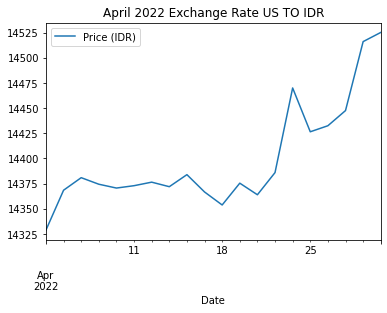

In [18]:
df[df['Month']== 'April'].plot(title = 'April 2022 Exchange Rate US TO IDR')

<AxesSubplot:title={'center':'May 2022 Exchange Rate US TO IDR'}, xlabel='Date'>

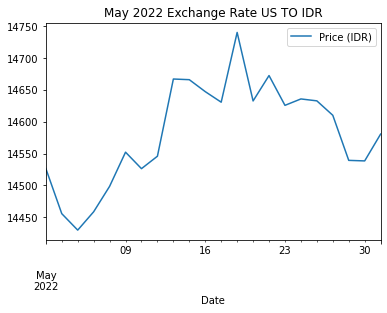

In [19]:
df[df['Month']== 'May'].plot(title = 'May 2022 Exchange Rate US TO IDR')

<AxesSubplot:title={'center':'June 2022 Exchange Rate US TO IDR'}, xlabel='Date'>

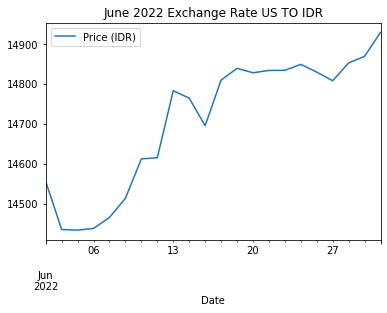

In [20]:
df[df['Month']== 'June'].plot(title = 'June 2022 Exchange Rate US TO IDR')

<AxesSubplot:title={'center':'July 2022 Exchange Rate US TO IDR'}, xlabel='Date'>

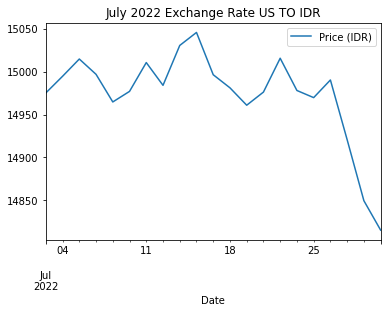

In [21]:
df[df['Month']== 'July'].plot(title = 'July 2022 Exchange Rate US TO IDR')

<AxesSubplot:title={'center':'August 2022 Exchange Rate US TO IDR'}, xlabel='Date'>

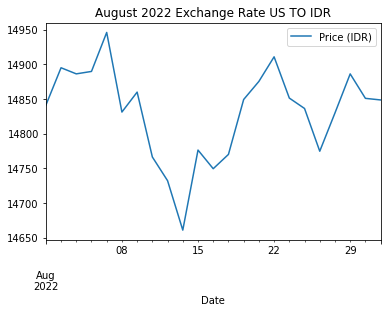

In [22]:
df[df['Month']== 'August'].plot(title = 'August 2022 Exchange Rate US TO IDR')

<AxesSubplot:title={'center':'Sept 2022 Exchange Rate US TO IDR'}, xlabel='Date'>

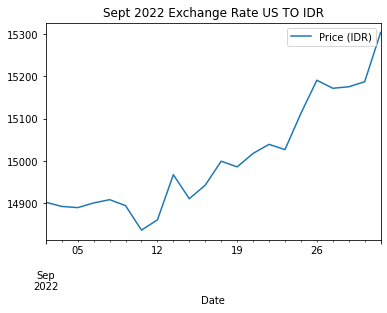

In [23]:
df[df['Month']== 'September'].plot(title = 'Sept 2022 Exchange Rate US TO IDR')

### Conclusion

From the data, here are my conclusions for exchange rate US to IDR in the time frame from 4/4/2022 and 9/30/2022 

- The highest exchange rate occured in September 29th and the lowest occured on April
- The exchange rate on average is always rising from April - September 2022
- The exchange rate in every month tends to always move (decline and increase) and is rarely stable.
- The highest decline of exchange rates occurred in July
- The average exchange rate from April untul August is around 14700 IDR

Further Analysis
- The value of Indonesian Rupiah (IDR) tends to always weaken against USD and more expensive in average months by months (April - August 2022)
- The impact that is felt by the weakening of the rupiah exchange rate is the price of imported products that are increasingly expensive. Rising prices of imported goods will make people switch to local products that are more affordable.
- If the rupiah exchange rate weakens, the value of the US dollar will increase. That way, those who earn US dollars will benefit. Because the dollar earned when converted to rupiah, the amount of rupiah obtained is more than before the weakening of the rupiah.


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.